In [4]:
from gym.version import VERSION
print(VERSION) # make sure the new version of gym is loaded
import gym
import numpy as np
import tensorflow as tf

cust_layer_nums = [128,64]
start_epsilon = 0.5
act_func = tf.keras.activations.tanh

class Agent:
  def __init__(self, obs_shape, act_size):
    self.obs_shape = obs_shape
    self.act_size = act_size
  def network(self, train=True):
    inputs = tf.keras.Input(shape=(self.obs_shape,), name="input")
    x=None
    for i,l in enumerate(cust_layer_nums):
      if i==0:
        x = tf.keras.layers.Dense(cust_layer_nums[i], activation=act_func, name=f"dense_{i+1}")(inputs)
      else:
        x = tf.keras.layers.Dense(cust_layer_nums[i], activation=act_func, name=f"dense_{i+1}")(x)
    outputs = tf.keras.layers.Dense(self.act_size, name="output")(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="nn", trainable=train)
    return model
class Util:
  def __init__(self):
    self.optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(0.01, decay_steps=50, decay_rate=0.9))
    self.history = []
  def record_history(self, current_state, action, reward, next_state):
    self.history.append([current_state, action, reward, next_state])
  def td_loss(self, nn, discount=0.99):
    loss = []
    for current_state, action, reward, next_state in self.history:
      binary_action = [0.0] * nn.output.shape[1]
      binary_action[action] = 1.0
      binary_action = tf.constant([binary_action])
      q_current = nn(tf.convert_to_tensor([current_state]))
      max_q_next = tf.math.reduce_max(nn(tf.convert_to_tensor([next_state])))
      loss.append(tf.math.square((reward + discount * max_q_next - q_current) * binary_action))
    return tf.math.reduce_mean(loss, axis=0)
  
  def update_model(self, nn):
    with tf.GradientTape() as tape:
      loss = self.td_loss(nn)
    grads = tape.gradient(loss, nn.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, nn.trainable_variables))
    self.history = []

env = gym.make("CartPole-v1")
agent = Agent(4, 2).network()
utility = Util()
# train
epsilon = start_epsilon
i, early_stop = 0, 0
n_game = 2000

steps_per_game = []

while i < n_game:
  current_state = env.reset()
  step = 0
  while True:
    if np.random.uniform() < epsilon:
      action = env.action_space.sample()
    else:
      action = tf.math.argmax(tf.reshape(agent(tf.convert_to_tensor([current_state])), [-1])).numpy()
    next_state, reward, done, info = env.step(action)
    step += 1
    utility.record_history(current_state, action, reward, next_state)
    current_state = next_state
    if len(utility.history) == 50:
      utility.update_model(agent)
    epsilon = max(epsilon * 0.99, 0.02)
    if done:
      print(i, step)
      steps_per_game.append(step)
      i += 1
      if step >= 500:
        early_stop += 1
      else:
        early_stop = 0
      if early_stop >= 10:
        i = n_game
      break
# test
for i in range(10):
  env.close()
  env = gym.make("CartPole-v1")
  state = env.reset()
  step = 0
  while True:
    action = tf.math.argmax(tf.reshape(agent(tf.convert_to_tensor([state])), [-1])).numpy()
    state, reward, done, info = env.step(action)
    step += 1
    if done:
      print(i, step)
      break
env.close()
# save agent
# agent.save("cartpole_dql")

0.23.1
0 37
1 23
2 11
3 10
4 8
5 9
6 13
7 13
8 10
9 9
10 11
11 35
12 34
13 46
14 42
15 27
16 40
17 33
18 21
19 20
20 16
21 29
22 16
23 18
24 19
25 14
26 17
27 14
28 12
29 13
30 15
31 13
32 12
33 10
34 12
35 14
36 13
37 14
38 13
39 12
40 12
41 15
42 15
43 14
44 12
45 10
46 13
47 9
48 15
49 12
50 15
51 14
52 14
53 17
54 18
55 15
56 19
57 17
58 18
59 20
60 21
61 14
62 23
63 36
64 34
65 41
66 69
67 77
68 46
69 50
70 92
71 32
72 39
73 72
74 85
75 60
76 25
77 30
78 21
79 31
80 22
81 16
82 31
83 17
84 16
85 19
86 14
87 14
88 19
89 15
90 15
91 15
92 16
93 16
94 16
95 12
96 14
97 13
98 13
99 10
100 13
101 10
102 10
103 9
104 9
105 10
106 11
107 9
108 10
109 8
110 9
111 9
112 8
113 10
114 10
115 9
116 9
117 10
118 9
119 10
120 11
121 10
122 10
123 11
124 10
125 10
126 10
127 9
128 10
129 8
130 11
131 9
132 10
133 13
134 8
135 10
136 10
137 9
138 10
139 10
140 9
141 11
142 9
143 10
144 8
145 9
146 9
147 10
148 10
149 10
150 9
151 9
152 10
153 9
154 10
155 10
156 10
157 9
158 11
159 9
160 9
161 10

1207 40
1208 10
1209 10
1210 39
1211 36
1212 9
1213 11
1214 12
1215 37
1216 11
1217 30
1218 11
1219 10
1220 10
1221 11
1222 10
1223 10
1224 9
1225 9
1226 11
1227 10
1228 9
1229 10
1230 9
1231 8
1232 10
1233 9
1234 9
1235 9
1236 9
1237 10
1238 8
1239 9
1240 9
1241 9
1242 9
1243 10
1244 9
1245 10
1246 11
1247 8
1248 9
1249 9
1250 8
1251 10
1252 8
1253 10
1254 8
1255 9
1256 10
1257 10
1258 9
1259 12
1260 10
1261 10
1262 9
1263 9
1264 11
1265 9
1266 10
1267 10
1268 11
1269 10
1270 9
1271 9
1272 9
1273 10
1274 9
1275 8
1276 9
1277 39
1278 9
1279 34
1280 33
1281 25
1282 22
1283 12
1284 25
1285 42
1286 64
1287 59
1288 59
1289 105
1290 52
1291 48
1292 42
1293 33
1294 39
1295 39
1296 30
1297 29
1298 22
1299 16
1300 21
1301 38
1302 20
1303 28
1304 23
1305 11
1306 14
1307 43
1308 10
1309 18
1310 13
1311 34
1312 18
1313 33
1314 15
1315 44
1316 13
1317 11
1318 12
1319 43
1320 11
1321 38
1322 11
1323 10
1324 10
1325 10
1326 12
1327 38
1328 12
1329 10
1330 10
1331 12
1332 9
1333 10
1334 11
1335 12
13

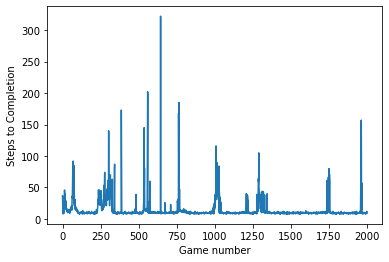

In [8]:
import matplotlib.pyplot as plt

plt.plot(steps_per_game)
plt.xlabel("Game number")
plt.ylabel("Steps to Completion")
plt.show()

In [9]:
import pickle

lstr = ""
for i in cust_layer_nums:
  lstr+=f"{i}_"
f = open("fnames.txt", "r+")
fnames = f.readlines()
name = (f"cartpole_tan_{start_epsilon}_"+lstr[:-1]+'\n')
f.write(name)

with open(f"cartpole_tan_{start_epsilon}_"+lstr[:-1]+'_games', "wb") as fp:   #Pickling
  pickle.dump(steps_per_game, fp)

f.close()
print(open("fnames.txt", "r+").readlines(0))

agent.save("cartpole_dql_"+lstr[:-1])

['cartpole_dql_0.1_128_64\n', 'cartpole_dql_1_128_64\n', 'cartpole_tan_0.5_128_64\n', 'cartpole_tan_0.5_128_64\n']
INFO:tensorflow:Assets written to: cartpole_dql_128_64\assets


opening: cartpole_dql_0.1_128_64
opening: cartpole_dql_1_128_64
opening: cartpole_tan_0.5_128_64
opening: cartpole_tan_0.5_128_64


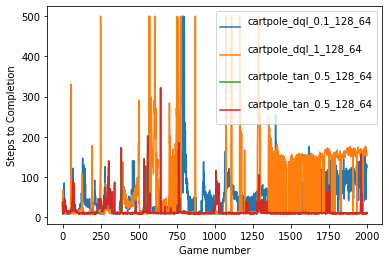

In [10]:
import matplotlib.pyplot as plt
import pickle

f = open("fnames.txt", "r+")
fnames = f.readlines()

steps = []

for i in fnames:
  b=None
  print(f"opening: {i[:-1]}")
  with open(i[:-1]+"_games", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
    #print(b)
    steps.append(b)
  plt.plot(range(0,len(b)), b)
plt.xlabel("Game number")
plt.ylabel("Steps to Completion")
plt.legend(fnames)
plt.show()